In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import namedtuple
from numba import jit

In [28]:

def markov_pi(N, delta):
    N_hits = 0
    rej = 0
    Point = namedtuple("Point", ["x", "y"])
    pos = Point(1, 1)
    for i in range(N):
        delta_x = rd.uniform(-1*delta, delta)
        delta_y = rd.uniform(-1*delta, delta)
        new_x = pos.x + delta_x
        new_y = pos.y + delta_y
        if np.abs(new_x) < 1 and np.abs(new_y) < 1:
            pos = Point(new_x, new_y)
        else:
            rej += 1
        if (pos.x**2 + pos.y**2) < 1:
            N_hits += 1
            
    return N_hits, rej

def measure_markov(trials, delta):
    data_hits = [[] for i in range(len(trials))]
    rejections = [[] for i in range(len(trials))]
    k = 0
    j = 0 
    while k < len(trials):
        while j < 20:
            output = markov_pi(trials[k], delta)
            data_hits[k].append(output[0])
            rejections[k].append(output[1])
            j += 1
        k += 1
        j = 0
        
    pi_est = [np.array(data_hits[i])/trials[i] for i in range(len(trials))]
    dev = [np.mean((pi_est[i] - np.pi/4)**2) for i in range(len(pi_est))]
    rej_rate = [np.mean(rejections[i])/trials[i] for i in range(len(trials))]  

    return pi_est, rej_rate, dev

def plot_data_markov(trials, delta, est, rej, dev):
    
    pi_est = np.array([np.mean(i) for i in est])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
    fig.tight_layout(pad=3.5)

    ax1.plot(trials, 4*pi_est, color='tab:blue')
    ax1.scatter(trials, 4*pi_est, color='tab:blue', label="Estimated Pi")
        
    ax1.axhline(np.pi, 0, trials[-1], color='tab:red', label="Pi")
    ax1.set_xlabel("log(N)")
    ax1.set_ylabel( r"$4N_{hits}/N$")
    ax1.set_xscale('log')
    ax1.grid(alpha=0.25)
    ax1.legend()
    ax1.set_title(r"Estimation of Pi for $\delta$=0.3")

    ax2.scatter(trials, dev)
    ax2.plot(trials, dev)
    ax2.set_xlabel("log(N)")
    ax2.set_ylabel( r"$\langle (N_{hits}/N - \pi/4)^2 \rangle$")
    ax2.set_xscale('log')
    ax2.grid(alpha=0.25)
    ax2.set_title(r"Devitation of Estimated Pi for $\delta$=0.3")


### Fixed delta

In [8]:
trials = [10**i for i in range(1,7)]
delta = 0.3
results = measure_markov(trials, delta)

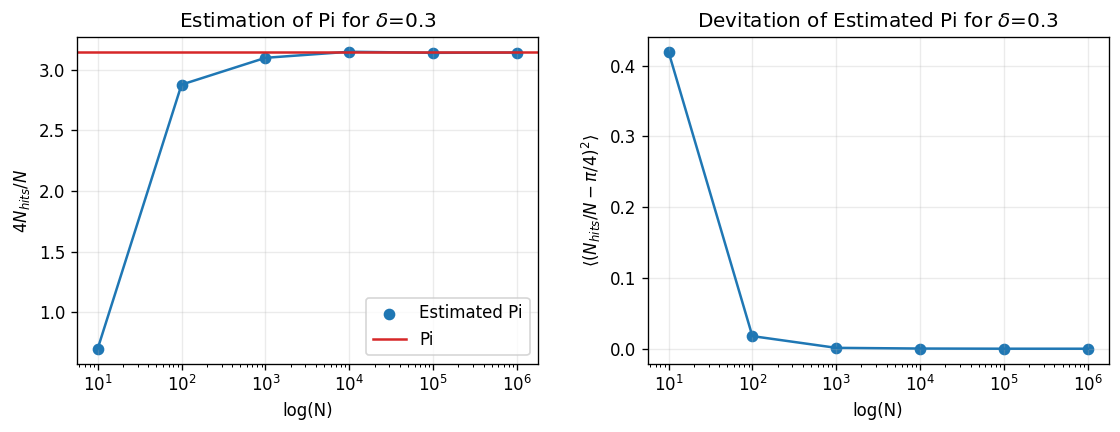

In [9]:
plot_data_markov(trials, delta, *results)

### Variable delta

In [46]:
trials = [10000]
delta = np.linspace(0.0, 3.0, 999)
deviations = []
rate = []
for d in delta:
    results = measure_markov(trials, d)
    rate.append(results[1])
    deviations.append(results[2][0])

deviations.pop(0)
rate.pop(0)


[1.0]

In [32]:
print(len(deviations), len(rate))

99 99


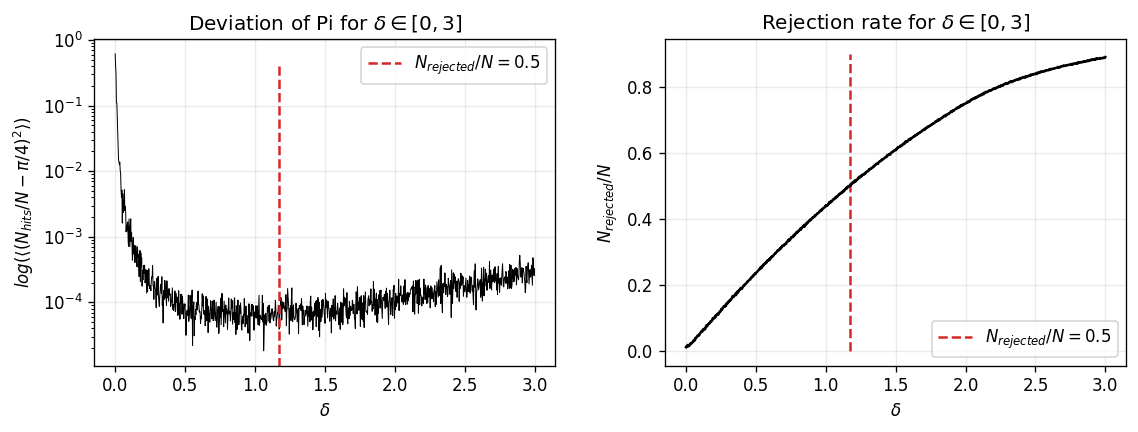

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
fig.tight_layout(pad=3.5)

delta = np.linspace(0.0, 3.0, 998)
ax1.plot(delta, deviations, color='black', lw=0.6)
#ax1.scatter(delta, deviations, color='tab:blue', label="Estimated Pi")

half_rate = np.abs(np.array(rate) - 0.5)
min_delta = delta[np.argmin(half_rate)]

mindev = deviations[int(min_delta)]

ax1.set_xlabel(r"$\delta$")
ax1.set_ylabel( r"$log(\langle (N_{hits}/N - \pi/4)^2 \rangle$)")
ax1.grid(alpha=0.25)

ax1.set_title(r"Deviation of Pi for $\delta \in [0, 3]$")
ax1.set_yscale("log")
ax1.vlines(min_delta, mindev, 0, linestyle= "dashed", colors = "tab:red", label=r"$N_{rejected}/N = 0.5$" )
ax1.legend()

ax2.vlines(min_delta, 0, 0.9, linestyle= "dashed", colors = "tab:red", label=r"$N_{rejected}/N = 0.5$" )
#ax2.scatter(delta, rate)
ax2.plot(delta, rate, color="black")
ax2.set_xlabel(r"$\delta$")
ax2.set_xlim()
ax2.set_ylabel(r"$N_{rejected}/N $")
ax2.grid(alpha=0.25)
ax2.set_title(r"Rejection rate for $\delta \in [0, 3]$")
ax2.legend(loc="lower right")
